# COGS 108 - Final Project

# Overview

# Names

# Group Members IDs

# Research Question

# Background and Prior Work

# Hypothesis


# Dataset(s)

# Setup

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Cleaning

In [34]:
#read the pfac data, which shows the actuall police control area of the county
pfac = pd.read_csv('../data/PFAC.csv')

#read the scenery data 
df = pd.read_csv('scenery.csv', encoding = "ISO-8859-1")
print('Size of the dataset: ' + str(df.shape[0]))

#switch the colomns and rows for pfac data
pfac = pfac.transpose()
pfac.reset_index(inplace = True)

#reset the header of the pfac data
new_header = pfac.iloc[0]
pfac = pfac[1:]
pfac.columns = new_header
crime_df = pd.read_csv('../data/number_crime.csv')

#make list of crime data's column names
cols = list(crime_df)

#remove all commas from the numbers
crime_df[cols] = crime_df[cols].replace(',', '', regex = True)


print(pfac.shape[1])

Size of the dataset: 212155
43


In [35]:
#find the county
def matchCounty(area):
    for i in pfac.columns:
        if area in list(pfac[i]):
            return i
    return np.nan

In [36]:
#the unique
len(df['County'].unique()) 

214

In [37]:
#df['County'].unique()

In [38]:
df['County'] = df['County'].apply(matchCounty)
len(df['County'].unique())

44

In [39]:
sum(df['County'].isnull())

65530

# Data Analysis & Results

##### comment
drop every column except 'County' and 'Rating'

calculate avg_rating and standard_deviation from 'Rating' and add 'num_pictures'

In [40]:
import statistics

df_rate = df.drop(columns=['ID', 'Place', 'Variance', 'Near', 'Category', 'Image', 'Date', 'URL'])
df_rate = df_rate.dropna()
df_rate['Avg_Rating'] = df_rate['Rating']
df_rate['Standard_Deviation'] = df_rate['Rating']
df_rate = df_rate.drop(columns=['Rating'])
df_rate['num_pictures'] = 1


aggregation_functions = {'Avg_Rating': 'mean', 'Standard_Deviation': 'std', 'num_pictures': 'sum'}
df_rate_mean = df_rate.groupby(df_rate['County']).aggregate(aggregation_functions)
df_rate_mean

,Avg_Rating,Standard_Deviation,num_pictures
County,,,
Avon and Somerset,2.712359,1.873534,4755
Bedfordshire,2.548122,1.870577,1187
Cambridgeshire,2.462462,1.848670,3209
Cheshire,2.526800,1.835459,2296
City of London,3.209225,1.974855,4
Cleveland,2.363048,1.900951,299
Cumbria,2.908924,1.928069,6869
Derbyshire,2.706742,1.929414,2558
Devon and Cornwall,2.788292,1.834246,10616


AxesSubplot(0.125,0.125;0.775x0.755)


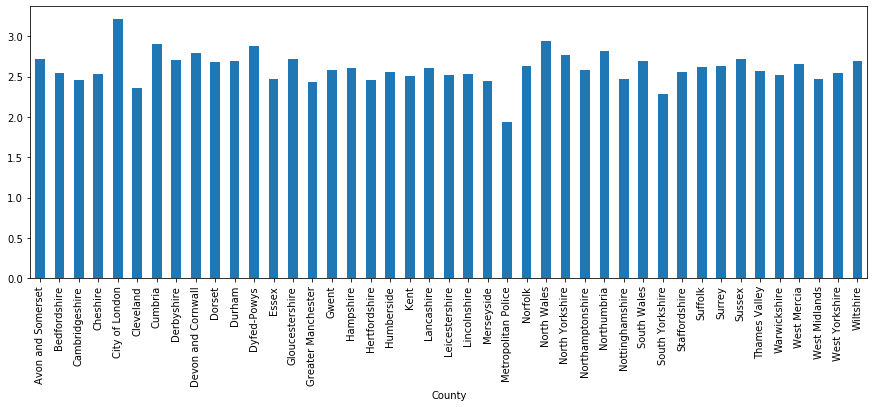

In [41]:
plot1 = df_rate_mean['Avg_Rating'].plot(figsize=(15, 5),kind='bar')
print(plot1)

In [42]:
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

In [43]:
df_crime = pd.read_csv('../data/crime_final.csv')
df_crime.drop(df_crime.columns[0],axis=1,inplace = True)
t = df_rate_mean['Avg_Rating']
df_crime['avg_scenery'] = t

l = df_rate_mean.index.tolist()
for i in range(0,41):
   
    if df_crime.loc[i]['AreaName'] in l:     
        df_crime.set_value(i,'avg_scenery', df_rate_mean.loc[df_crime.loc[i]['AreaName']]['Avg_Rating'])
        
        

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.


In [44]:
df_crime = df_crime.dropna()
#print(df_crime)
for i in range(0,41):
     for j in df_crime.columns:
        if ',' in str(df_crime.loc[i][j]):
             df_crime.set_value(i, j, df_crime.loc[i][j].replace(',' , ''))

for i in df_crime.columns:
     if i != 'AreaName':
        df_crime[i] = df_crime[i].astype(float)



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [45]:
#print(df_crime)
df_crime_norm = pd.DataFrame()
df_crime_norm['AreaName'] = df_crime['AreaName']
for i in df_crime.columns:
    if (i != 'AreaName') & (i != 'PopulationFigures') & (i != 'avg_scenery') & (i != 'HouseHoldfigures'):
        df_crime_norm[i] = df_crime[i] / df_crime['PopulationFigures']
        
df_crime_norm['avg_scenery'] = df_crime['avg_scenery']
df_crime_norm.head()

,AreaName,TotalRecordedCrime,ViolenceAgainstThePerson,Homicide,ViolenceWithInjury,ViolenceWithoutInjury,StalkingAndHarassment,UnlawfulDriving,SexualOffences,Robbery,...,TheftFromThePerson,BicycleTheft,Shoplifting,OtherTheftOffences,CriminalDamageAndArson,DrugOffences,PossessionOfWeaponsOffences,PublicOrderOffences,MiscellaneousCrimes,avg_scenery
0,Cleveland,0.115502,0.035516,0.000026,0.010346,0.013200,0.011929,0.000014,0.003100,0.001026,...,0.000901,0.001754,0.015661,0.011213,0.016549,0.002292,0.000666,0.006775,0.002423,2.363048
1,Durham,0.099037,0.037949,0.000008,0.009108,0.013230,0.015583,0.000021,0.002992,0.000384,...,0.000452,0.000752,0.007717,0.008503,0.015214,0.002014,0.000460,0.008160,0.002754,2.698612
2,Northumbria,0.110653,0.033069,0.000008,0.009217,0.013794,0.010025,0.000026,0.003418,0.000590,...,0.000981,0.001399,0.009720,0.011619,0.015699,0.002308,0.000961,0.016154,0.002574,2.821843
3,Cheshire,0.089366,0.030927,0.000018,0.010046,0.012230,0.008628,0.000004,0.003031,0.000395,...,0.000602,0.001496,0.006720,0.007316,0.009640,0.002068,0.000505,0.017053,0.001747,2.526800
4,Cumbria,0.070971,0.026573,0.000008,0.009751,0.010979,0.005825,0.000010,0.003196,0.000247,...,0.000395,0.000594,0.005817,0.006441,0.010951,0.002051,0.000506,0.006188,0.001439,2.908924


In [46]:
df_crime_norm.drop(index=27,inplace = True)
df_crime_norm.reset_index(drop=True)

,AreaName,TotalRecordedCrime,ViolenceAgainstThePerson,Homicide,ViolenceWithInjury,ViolenceWithoutInjury,StalkingAndHarassment,UnlawfulDriving,SexualOffences,Robbery,...,TheftFromThePerson,BicycleTheft,Shoplifting,OtherTheftOffences,CriminalDamageAndArson,DrugOffences,PossessionOfWeaponsOffences,PublicOrderOffences,MiscellaneousCrimes,avg_scenery
0,Cleveland,0.115502,0.035516,2.649241e-05,0.010346,0.013200,0.011929,0.000014,0.003100,0.001026,...,0.000901,0.001754,0.015661,0.011213,0.016549,0.002292,0.000666,0.006775,0.002423,2.363048
1,Durham,0.099037,0.037949,7.936508e-06,0.009108,0.013230,0.015583,0.000021,0.002992,0.000384,...,0.000452,0.000752,0.007717,0.008503,0.015214,0.002014,0.000460,0.008160,0.002754,2.698612
2,Northumbria,0.110653,0.033069,7.593539e-06,0.009217,0.013794,0.010025,0.000026,0.003418,0.000590,...,0.000981,0.001399,0.009720,0.011619,0.015699,0.002308,0.000961,0.016154,0.002574,2.821843
3,Cheshire,0.089366,0.030927,1.802486e-05,0.010046,0.012230,0.008628,0.000004,0.003031,0.000395,...,0.000602,0.001496,0.006720,0.007316,0.009640,0.002068,0.000505,0.017053,0.001747,2.526800
4,Cumbria,0.070971,0.026573,8.025682e-06,0.009751,0.010979,0.005825,0.000010,0.003196,0.000247,...,0.000395,0.000594,0.005817,0.006441,0.010951,0.002051,0.000506,0.006188,0.001439,2.908924
5,Greater Manchester,0.119686,0.034742,2.786909e-05,0.010212,0.016307,0.008184,0.000011,0.003450,0.002730,...,0.002626,0.001451,0.006200,0.011468,0.012799,0.001780,0.001266,0.016132,0.002952,2.428156
6,Lancashire,0.109238,0.041780,1.408923e-05,0.013365,0.015458,0.012940,0.000003,0.003442,0.000736,...,0.001342,0.001139,0.006358,0.010988,0.013578,0.001571,0.000470,0.010022,0.002174,2.600273
7,Merseyside,0.094695,0.030881,1.482213e-05,0.010162,0.012114,0.008576,0.000013,0.002250,0.001032,...,0.001515,0.001334,0.006102,0.007505,0.011525,0.005774,0.000729,0.008956,0.001942,2.445716
8,Humberside,0.105722,0.035216,1.828154e-05,0.011807,0.013914,0.009454,0.000023,0.003414,0.001046,...,0.000755,0.002415,0.011137,0.009098,0.013775,0.001478,0.000547,0.009028,0.002612,2.557852
9,North Yorkshire,0.053381,0.016747,6.099049e-06,0.006671,0.006682,0.003343,0.000044,0.002262,0.000257,...,0.000589,0.001436,0.005426,0.005740,0.007310,0.001907,0.000377,0.002696,0.000990,2.771272


In [47]:
df_crime_norm.corr()

,TotalRecordedCrime,ViolenceAgainstThePerson,Homicide,ViolenceWithInjury,ViolenceWithoutInjury,StalkingAndHarassment,UnlawfulDriving,SexualOffences,Robbery,TheftOffences,...,TheftFromThePerson,BicycleTheft,Shoplifting,OtherTheftOffences,CriminalDamageAndArson,DrugOffences,PossessionOfWeaponsOffences,PublicOrderOffences,MiscellaneousCrimes,avg_scenery
TotalRecordedCrime,1.000000,0.903419,0.596562,0.723220,0.814026,0.818413,0.147078,0.736742,0.495111,0.790764,...,0.441415,0.051769,0.619430,0.833660,0.825883,0.081959,0.506696,0.756837,0.870745,-0.467308
ViolenceAgainstThePerson,0.903419,1.000000,0.434092,0.779224,0.900779,0.918736,0.177256,0.839539,0.220310,0.501103,...,0.171175,-0.161332,0.511596,0.619899,0.836280,0.021416,0.342632,0.732675,0.872585,-0.220280
Homicide,0.596562,0.434092,1.000000,0.461580,0.391666,0.326473,-0.041253,0.384165,0.558904,0.636160,...,0.457671,0.155425,0.459402,0.524628,0.363961,0.080297,0.450833,0.362809,0.418590,-0.449284
ViolenceWithInjury,0.723220,0.779224,0.461580,1.000000,0.564337,0.626285,-0.050517,0.732123,0.301651,0.473311,...,0.185660,-0.219353,0.484415,0.491666,0.624100,0.022490,0.301361,0.490060,0.617124,-0.217664
ViolenceWithoutInjury,0.814026,0.900779,0.391666,0.564337,1.000000,0.721041,0.239791,0.819622,0.221935,0.433981,...,0.188485,0.006200,0.357910,0.558253,0.683246,0.002554,0.378601,0.730255,0.797445,-0.187419
StalkingAndHarassment,0.818413,0.918736,0.326473,0.626285,0.721041,1.000000,0.189545,0.664243,0.104415,0.429286,...,0.093283,-0.244217,0.521257,0.564453,0.852833,0.033025,0.225688,0.650564,0.825911,-0.186343
UnlawfulDriving,0.147078,0.177256,-0.041253,-0.050517,0.239791,0.189545,1.000000,0.214461,-0.065522,0.085118,...,-0.065930,0.145760,0.167137,0.048864,0.153706,-0.119686,0.132829,0.075099,0.301767,0.009111
SexualOffences,0.736742,0.839539,0.384165,0.732123,0.819622,0.664243,0.214461,1.000000,0.156163,0.369867,...,0.079133,-0.086455,0.487462,0.512213,0.675734,-0.195834,0.344331,0.631081,0.748041,-0.054986
Robbery,0.495111,0.220310,0.558904,0.301651,0.221935,0.104415,-0.065522,0.156163,1.000000,0.761527,...,0.857456,0.201862,0.095641,0.659862,0.039844,0.183771,0.563010,0.180163,0.212535,-0.749047
TheftOffences,0.790764,0.501103,0.636160,0.473311,0.433981,0.429286,0.085118,0.369867,0.761527,1.000000,...,0.682194,0.346012,0.586433,0.868180,0.469959,0.053711,0.564830,0.339226,0.538221,-0.731890


                            OLS Regression Results                            
Dep. Variable:     TotalRecordedCrime   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     10.62
Date:                Sun, 02 Jun 2019   Prob (F-statistic):            0.00236
Time:                        23:09:58   Log-Likelihood:                 105.98
No. Observations:                  40   AIC:                            -208.0
Df Residuals:                      38   BIC:                            -204.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2204      0.043      5.174      

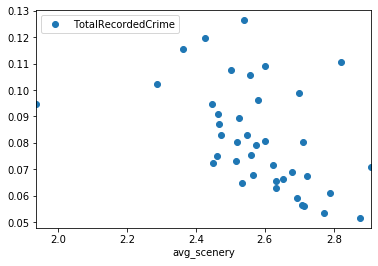

In [48]:
outcome_0, predictors_0 = patsy.dmatrices("TotalRecordedCrime ~ avg_scenery", data = df_crime_norm)
mod_0 = sm.OLS(outcome_0, predictors_0)
res_0 = mod_0.fit()
print(res_0.summary())
df_crime_norm.plot(x='avg_scenery',y='TotalRecordedCrime',style='o')

                            OLS Regression Results                            
Dep. Variable:     TheftFromThePerson   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     53.52
Date:                Sun, 02 Jun 2019   Prob (F-statistic):           9.23e-09
Time:                        23:09:58   Log-Likelihood:                 247.60
No. Observations:                  40   AIC:                            -491.2
Df Residuals:                      38   BIC:                            -487.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0100      0.001      8.085      

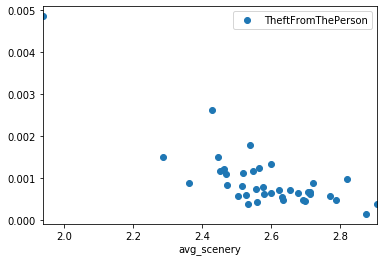

In [49]:
outcome_1, predictors_1 = patsy.dmatrices("TheftFromThePerson ~ avg_scenery", data = df_crime_norm)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())
df_crime_norm.plot(x='avg_scenery',y='TheftFromThePerson',style='o')

                            OLS Regression Results                            
Dep. Variable:          TheftOffences   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     43.84
Date:                Sun, 02 Jun 2019   Prob (F-statistic):           8.05e-08
Time:                        23:09:59   Log-Likelihood:                 152.39
No. Observations:                  40   AIC:                            -300.8
Df Residuals:                      38   BIC:                            -297.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.1186      0.013      8.883      

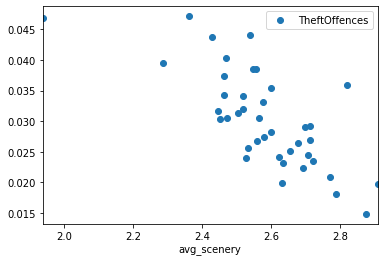

In [50]:
outcome_2, predictors_2 = patsy.dmatrices("TheftOffences ~ avg_scenery", data = df_crime_norm)
mod_2 = sm.OLS(outcome_2, predictors_2)
res_2 = mod_2.fit()
print(res_2.summary())
df_crime_norm.plot(x='avg_scenery',y='TheftOffences',style='o')

                            OLS Regression Results                            
Dep. Variable:        VehicleOffences   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     41.12
Date:                Sun, 02 Jun 2019   Prob (F-statistic):           1.55e-07
Time:                        23:09:59   Log-Likelihood:                 193.91
No. Observations:                  40   AIC:                            -383.8
Df Residuals:                      38   BIC:                            -380.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0369      0.005      7.797      

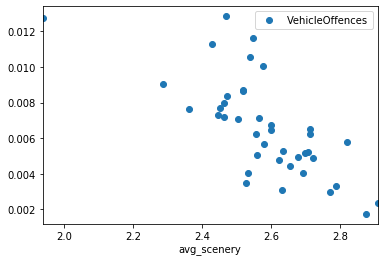

In [51]:
outcome_3, predictors_3 = patsy.dmatrices("VehicleOffences ~ avg_scenery", data = df_crime_norm)
mod_3 = sm.OLS(outcome_3, predictors_3)
res_3 = mod_3.fit()
print(res_3.summary())
df_crime_norm.plot(x='avg_scenery',y='VehicleOffences',style='o')

                             OLS Regression Results                            
Dep. Variable:     ResidentialBurglary   R-squared:                       0.436
Model:                             OLS   Adj. R-squared:                  0.421
Method:                  Least Squares   F-statistic:                     29.36
Date:                 Sun, 02 Jun 2019   Prob (F-statistic):           3.57e-06
Time:                         23:09:59   Log-Likelihood:                 210.70
No. Observations:                   40   AIC:                            -417.4
Df Residuals:                       38   BIC:                            -414.0
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0214      0.003      6

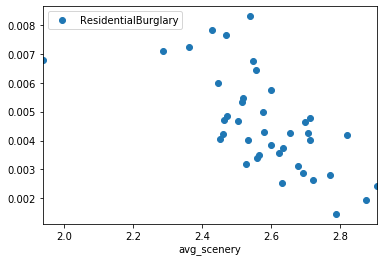

In [52]:
outcome_4, predictors_4 = patsy.dmatrices("ResidentialBurglary ~ avg_scenery", data = df_crime_norm)
mod_4 = sm.OLS(outcome_4, predictors_4)
res_4 = mod_4.fit()
print(res_4.summary())
df_crime_norm.plot(x='avg_scenery',y='ResidentialBurglary',style='o')

                            OLS Regression Results                            
Dep. Variable:        UnlawfulDriving   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.026
Method:                 Least Squares   F-statistic:                  0.003155
Date:                Sun, 02 Jun 2019   Prob (F-statistic):              0.956
Time:                        23:09:59   Log-Likelihood:                 404.95
No. Observations:                  40   AIC:                            -805.9
Df Residuals:                      38   BIC:                            -802.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.252e-05   2.42e-05      0.518      

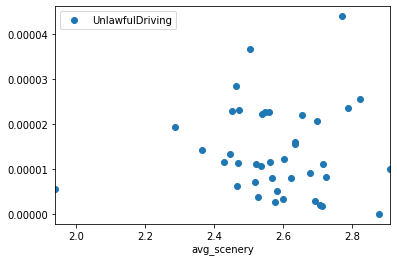

In [53]:
outcome_5, predictors_5 = patsy.dmatrices("UnlawfulDriving ~ avg_scenery", data = df_crime_norm)
mod_5 = sm.OLS(outcome_5, predictors_5)
res_5 = mod_5.fit()
print(res_5.summary())
df_crime_norm.plot(x='avg_scenery',y='UnlawfulDriving',style='o')

                            OLS Regression Results                            
Dep. Variable:         SexualOffences   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.023
Method:                 Least Squares   F-statistic:                    0.1152
Date:                Sun, 02 Jun 2019   Prob (F-statistic):              0.736
Time:                        23:09:59   Log-Likelihood:                 245.29
No. Observations:                  40   AIC:                            -486.6
Df Residuals:                      38   BIC:                            -483.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0031      0.001      2.367      

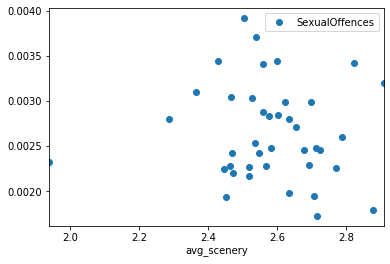

In [54]:
outcome_6, predictors_6 = patsy.dmatrices("SexualOffences ~ avg_scenery", data = df_crime_norm)
mod_6 = sm.OLS(outcome_6, predictors_6)
res_6 = mod_6.fit()
print(res_6.summary())
df_crime_norm.plot(x='avg_scenery',y='SexualOffences',style='o')

### Woonjoon

In [73]:
# df_income_table1: Total GDHI at current basic prices
income_data_file = '../data/income_table1mod.csv'
df_income = pd.read_csv(income_data_file)
df_income = df_income.drop(columns=['2016'])

#read the pfac data, which shows the actuall police control area of the county
pfac2 = pd.read_csv('../data/PFAC 2.csv')

#switch the colomns and rows for pfac data
pfac2 = pfac2.transpose()
pfac2.reset_index(inplace = True)

#reset the header of the pfac data
new_header = pfac2.iloc[0]
pfac2 = pfac2[1:]
pfac2.columns = new_header

In [74]:
#find the county
def matchCounty(area):
    for i in pfac2.columns:
        if area in list(pfac2[i]):
            return i
    return np.nan

In [75]:
# change 'Region name' to 'Police force area'
df_income['Region name'] = df_income['Region name'].apply(matchCounty)
df_income['Region name'].unique()

array(['Cleveland', 'Durham', 'Northumbria', 'Cumbria',
       'Greater Manchester', 'Lancashire', nan, 'Merseyside',
       'Humberside', 'North Yorkshire', 'South Yorkshire',
       'West Yorkshire', 'Derbyshire', 'Nottinghamshire',
       'Leicestershire', 'Northamptonshire', 'Lincolnshire',
       'West Mercia', 'Warwickshire', 'Staffordshire', 'West Midlands',
       'Cambridgeshire', 'Suffolk', 'Norfolk', 'Bedfordshire',
       'Hertfordshire', 'Essex', 'City of London', 'Metropolitan Police',
       'Thames Valley', 'Sussex', 'Surrey', 'Hampshire', 'Kent',
       'Avon and Somerset', 'Gloucestershire', 'Wiltshire',
       'Devon and Cornwall', 'North Wales', 'Gwent', 'South Wales',
       'Dyfed-Powys'], dtype=object)

In [76]:
# change 'Region name' column to 'County'
df_income['County'] = df_income['Region name']
df_income = df_income.drop(columns=['Region name'])

# sum all the same County
aggregation_functions = {'2017': 'mean'}
df_income = df_income.groupby(df_income['County']).aggregate(aggregation_functions)


In [77]:
df_income.drop(index='City of London',inplace = True)
df_income

,2017
County,
Avon and Somerset,11045.000000
Bedfordshire,4086.000000
Cambridgeshire,8399.000000
Cleveland,4353.000000
Cumbria,9239.000000
Derbyshire,5849.333333
Devon and Cornwall,15369.000000
Durham,4892.500000
Dyfed-Powys,2197.000000


In [80]:
df_crime_norm['avg_income'] = df_income.values
#df_crime['avg_scenery'] = t

l = df_income.index.tolist()
for i in df_crime_norm.index.tolist():
   
    if df_crime_norm.loc[i]['AreaName'] in l:     
        df_crime_norm.set_value(i,'avg_income', df_income.loc[df_crime_norm.loc[i]['AreaName']]['2017'])

        
df_crime_norm

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


,AreaName,TotalRecordedCrime,ViolenceAgainstThePerson,Homicide,ViolenceWithInjury,ViolenceWithoutInjury,StalkingAndHarassment,UnlawfulDriving,SexualOffences,Robbery,...,BicycleTheft,Shoplifting,OtherTheftOffences,CriminalDamageAndArson,DrugOffences,PossessionOfWeaponsOffences,PublicOrderOffences,MiscellaneousCrimes,avg_scenery,avg_income
0,Cleveland,0.115502,0.035516,2.649241e-05,0.010346,0.013200,0.011929,0.000014,0.003100,0.001026,...,0.001754,0.015661,0.011213,0.016549,0.002292,0.000666,0.006775,0.002423,2.363048,4353.000000
1,Durham,0.099037,0.037949,7.936508e-06,0.009108,0.013230,0.015583,0.000021,0.002992,0.000384,...,0.000752,0.007717,0.008503,0.015214,0.002014,0.000460,0.008160,0.002754,2.698612,4892.500000
2,Northumbria,0.110653,0.033069,7.593539e-06,0.009217,0.013794,0.010025,0.000026,0.003418,0.000590,...,0.001399,0.009720,0.011619,0.015699,0.002308,0.000961,0.016154,0.002574,2.821843,23320.000000
3,Cheshire,0.089366,0.030927,1.802486e-05,0.010046,0.012230,0.008628,0.000004,0.003031,0.000395,...,0.001496,0.006720,0.007316,0.009640,0.002068,0.000505,0.017053,0.001747,2.526800,4353.000000
4,Cumbria,0.070971,0.026573,8.025682e-06,0.009751,0.010979,0.005825,0.000010,0.003196,0.000247,...,0.000594,0.005817,0.006441,0.010951,0.002051,0.000506,0.006188,0.001439,2.908924,9239.000000
5,Greater Manchester,0.119686,0.034742,2.786909e-05,0.010212,0.016307,0.008184,0.000011,0.003450,0.002730,...,0.001451,0.006200,0.011468,0.012799,0.001780,0.001266,0.016132,0.002952,2.428156,45078.000000
6,Lancashire,0.109238,0.041780,1.408923e-05,0.013365,0.015458,0.012940,0.000003,0.003442,0.000736,...,0.001139,0.006358,0.010988,0.013578,0.001571,0.000470,0.010022,0.002174,2.600273,24011.000000
7,Merseyside,0.094695,0.030881,1.482213e-05,0.010162,0.012114,0.008576,0.000013,0.002250,0.001032,...,0.001334,0.006102,0.007505,0.011525,0.005774,0.000729,0.008956,0.001942,2.445716,24768.000000
8,Humberside,0.105722,0.035216,1.828154e-05,0.011807,0.013914,0.009454,0.000023,0.003414,0.001046,...,0.002415,0.011137,0.009098,0.013775,0.001478,0.000547,0.009028,0.002612,2.557852,14549.000000
9,North Yorkshire,0.053381,0.016747,6.099049e-06,0.006671,0.006682,0.003343,0.000044,0.002262,0.000257,...,0.001436,0.005426,0.005740,0.007310,0.001907,0.000377,0.002696,0.000990,2.771272,16316.000000


In [83]:
df_crime_norm.corr()

,TotalRecordedCrime,ViolenceAgainstThePerson,Homicide,ViolenceWithInjury,ViolenceWithoutInjury,StalkingAndHarassment,UnlawfulDriving,SexualOffences,Robbery,TheftOffences,...,BicycleTheft,Shoplifting,OtherTheftOffences,CriminalDamageAndArson,DrugOffences,PossessionOfWeaponsOffences,PublicOrderOffences,MiscellaneousCrimes,avg_scenery,avg_income
TotalRecordedCrime,1.000000,0.903419,0.596562,0.723220,0.814026,0.818413,0.147078,0.736742,0.495111,0.790764,...,0.051769,0.619430,0.833660,0.825883,0.081959,0.506696,0.756837,0.870745,-0.467308,0.447633
ViolenceAgainstThePerson,0.903419,1.000000,0.434092,0.779224,0.900779,0.918736,0.177256,0.839539,0.220310,0.501103,...,-0.161332,0.511596,0.619899,0.836280,0.021416,0.342632,0.732675,0.872585,-0.220280,0.364204
Homicide,0.596562,0.434092,1.000000,0.461580,0.391666,0.326473,-0.041253,0.384165,0.558904,0.636160,...,0.155425,0.459402,0.524628,0.363961,0.080297,0.450833,0.362809,0.418590,-0.449284,0.253849
ViolenceWithInjury,0.723220,0.779224,0.461580,1.000000,0.564337,0.626285,-0.050517,0.732123,0.301651,0.473311,...,-0.219353,0.484415,0.491666,0.624100,0.022490,0.301361,0.490060,0.617124,-0.217664,0.371764
ViolenceWithoutInjury,0.814026,0.900779,0.391666,0.564337,1.000000,0.721041,0.239791,0.819622,0.221935,0.433981,...,0.006200,0.357910,0.558253,0.683246,0.002554,0.378601,0.730255,0.797445,-0.187419,0.412687
StalkingAndHarassment,0.818413,0.918736,0.326473,0.626285,0.721041,1.000000,0.189545,0.664243,0.104415,0.429286,...,-0.244217,0.521257,0.564453,0.852833,0.033025,0.225688,0.650564,0.825911,-0.186343,0.200404
UnlawfulDriving,0.147078,0.177256,-0.041253,-0.050517,0.239791,0.189545,1.000000,0.214461,-0.065522,0.085118,...,0.145760,0.167137,0.048864,0.153706,-0.119686,0.132829,0.075099,0.301767,0.009111,0.265853
SexualOffences,0.736742,0.839539,0.384165,0.732123,0.819622,0.664243,0.214461,1.000000,0.156163,0.369867,...,-0.086455,0.487462,0.512213,0.675734,-0.195834,0.344331,0.631081,0.748041,-0.054986,0.253974
Robbery,0.495111,0.220310,0.558904,0.301651,0.221935,0.104415,-0.065522,0.156163,1.000000,0.761527,...,0.201862,0.095641,0.659862,0.039844,0.183771,0.563010,0.180163,0.212535,-0.749047,0.621223
TheftOffences,0.790764,0.501103,0.636160,0.473311,0.433981,0.429286,0.085118,0.369867,0.761527,1.000000,...,0.346012,0.586433,0.868180,0.469959,0.053711,0.564830,0.339226,0.538221,-0.731890,0.453633


                            OLS Regression Results                            
Dep. Variable:            avg_scenery   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     8.006
Date:                Sun, 02 Jun 2019   Prob (F-statistic):            0.00741
Time:                        23:25:26   Log-Likelihood:                 18.342
No. Observations:                  40   AIC:                            -32.68
Df Residuals:                      38   BIC:                            -29.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6729      0.042     64.393      0.0

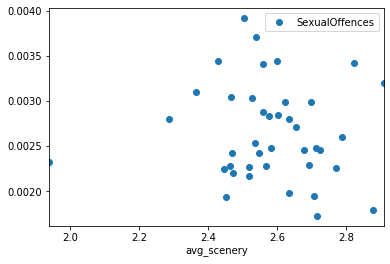

In [86]:
outcome_7, predictors_7 = patsy.dmatrices("avg_scenery ~ avg_income", data = df_crime_norm)
mod_7 = sm.OLS(outcome_7, predictors_7)
res_7 = mod_7.fit()
print(res_7.summary())
df_crime_norm.plot(x='avg_scenery',y='SexualOffences',style='o')

                            OLS Regression Results                            
Dep. Variable:                Robbery   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     23.88
Date:                Sun, 02 Jun 2019   Prob (F-statistic):           1.89e-05
Time:                        23:24:47   Log-Likelihood:                 242.91
No. Observations:                  40   AIC:                            -481.8
Df Residuals:                      38   BIC:                            -478.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0003      0.000      1.975      0.0

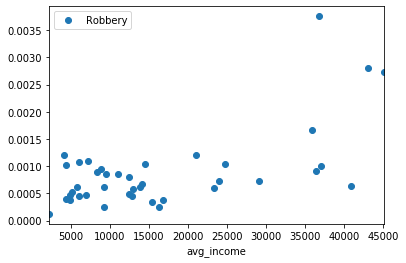

In [85]:
outcome_8, predictors_8 = patsy.dmatrices("Robbery ~ avg_income", data = df_crime_norm)
mod_8 = sm.OLS(outcome_8, predictors_8)
res_8 = mod_8.fit()
print(res_8.summary())
df_crime_norm.plot(x='avg_income',y='Robbery',style='o')

### Mazen's part

In [ ]:
import geopandas as gpd

In [ ]:
map_df = gpd.read_file('../data/PFA Geospatial Analysis Stuff/Police_Force_Areas_December_2016_Full_Extent_Boundaries_in_England_and_Wales.shp')

In [ ]:
df_crime['TotalCrimeNorm'] = df_crime['TotalRecordedCrime']/df_crime['PopulationFigures']
df_crime.drop(index=27,inplace = True)
merged = map_df.set_index("pfa16nm").join(df_crime.set_index("AreaName"))
merged = merged.join(df_rate_mean)

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# set a variable that will call whatever column we want to visualise on the map
variable = 'TotalRecordedCrime'

# set the range for the choropleth
vmin, vmax = int(min(merged[variable])), int(max(merged[variable]))

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 15))

# create map
merged.plot(column = variable, cmap = 'Reds', linewidth = 0.8, ax = ax, edgecolor = '0.8')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm._A = []

# add the colorbar to the figure
divider = make_axes_locatable(ax)
cax1 = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(sm, cax = cax1)

# remove the axis
ax.axis('off')

# add a title
title = ax.set_title("Total Recorded Crime (excl. Fraud)", fontdict = {'fontsize': '25', 'fontweight' : '3'}, y = 50)

# create an annotation for the data source
ax.annotate('Source: London Datastore, 2014', xy = (0, 0), xycoords = 'axes fraction', 
            horizontalalignment = 'left', verticalalignment = 'top', fontsize = 12, color = '#555555')



In [ ]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'TotalCrimeNorm'

# set the range for the choropleth
vmin, vmax = float(min(merged[variable])), float(max(merged[variable]))

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 15))

# create map
merged.plot(column = variable, cmap = 'Reds', linewidth = 0.8, ax = ax, edgecolor = '0.8')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm._A = []

# add the colorbar to the figure
divider = make_axes_locatable(ax)
cax1 = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(sm, cax = cax1)

# remove the axis
ax.axis('off')

# add a title
title = ax.set_title("Total Recorded Crime (Normalized)", fontdict = {'fontsize': '25', 'fontweight' : '3'}, y = 50)

# create an annotation for the data source
ax.annotate('Source: London Datastore, 2014', xy = (0, 0), xycoords = 'axes fraction', 
            horizontalalignment = 'left', verticalalignment = 'top', fontsize = 12, color = '#555555')



In [ ]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'Avg_Rating'

# set the range for the choropleth
vmin, vmax = float(min(merged[variable])), float(max(merged[variable]))

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 15))

# create map
merged.plot(column = variable, cmap = 'Greens', linewidth = 0.8, ax = ax, edgecolor = '0.8')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm._A = []

# add the colorbar to the figure
divider = make_axes_locatable(ax)
cax1 = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(sm, cax = cax1)

# remove the axis
ax.axis('off')

# add a title
title = ax.set_title("Average Rating", fontdict = {'fontsize': '25', 'fontweight' : '3'}, y = 50)

# create an annotation for the data source
ax.annotate('Source: London Datastore, 2014', xy = (0, 0), xycoords = 'axes fraction', 
            horizontalalignment = 'left', verticalalignment = 'top', fontsize = 12, color = '#555555')

# Ethics & Privacy

# Conclusion & Discussion